## The problem

Let $a_n = 1+\sqrt{2+\sqrt{3+\dots+\sqrt{n+\sqrt{n+1}}}}$. Show that $a_n$ is bounded

## The experimental solution

Let's try some numeric experiment first.

In [1]:
def a(n, prec=53, numeric=False):
    n0 = n
    value = n+1
    while n0 >0:
        value = (n0+sqrt(value))
        if numeric:
            value = value.n(prec=prec)
        n0 -= 1
    return value

The sequence

In [2]:
[a(n) for n in range(1,6)]

[sqrt(2) + 1,
 sqrt(sqrt(3) + 2) + 1,
 sqrt(sqrt(5) + 2) + 1,
 sqrt(sqrt(sqrt(sqrt(5) + 4) + 3) + 2) + 1,
 sqrt(sqrt(sqrt(sqrt(sqrt(6) + 5) + 4) + 3) + 2) + 1]

The numeric value

In [3]:
[a(n, numeric=True) for n in range(1,10)]

[2.41421356237309,
 2.93185165257814,
 3.05817102727149,
 3.08437362526552,
 3.08930271111850,
 3.09016194475189,
 3.09030226595168,
 3.09032389883267,
 3.09032706620193]

This does look convergent. What is the limit?

In [4]:
a(100000, numeric=True, prec=100)

3.0903275767905763591925445067

If you check this number on [WolframAlpha](https://www.wolframalpha.com/input/?i=3.0903275767905763591925445067), you will see that it's the square of the [nest-radical-constant](http://mathworld.wolfram.com/NestedRadicalConstant.html), which is defined by the limit of
$$
b_n = \sqrt{1+\sqrt{2+\dots \sqrt{n}}}
$$
And you will find this [OEIS page](http://oeis.org/A072449) for it. This page tells you that, 
$$
\sqrt{c_1+\sqrt{c_2+\dots \sqrt{c_n}}}
$$
converges if and only if 
$$
\limsup_{n \to \infty} \frac{\log(c_n)}{2^n} < \infty
$$
In other words, we take $c_n = e^{2^n}$ and we will still get convergent. This gives us a lot of liberty to upper bound the original problem.

The easiest choice is actually just take $c_n = 2^{2^n} \ge n$. Let see what we get.

In [5]:
def a1(n, prec=53, numeric=False):
    n0 = n
    value = 2^(2^(n+1))
    while n0 >0:
        value = (2^(2^n0))+sqrt(value)
        if numeric:
            value = value.n(prec=prec)
        n0 -= 1
    return sqrt(value)

In [6]:
a1l=[a1(n) for n in range(1,6)]
a1l

[2*sqrt(2),
 2*sqrt(sqrt(2) + 1),
 2*sqrt(sqrt(sqrt(2) + 1) + 1),
 2*sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1),
 2*sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1)]

So we just need to show this sequence converges

In [7]:
a1l = [1/2 * v for v in a1l]
a1l

[sqrt(2),
 sqrt(sqrt(2) + 1),
 sqrt(sqrt(sqrt(2) + 1) + 1),
 sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1),
 sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1)]

And this is quite obvious if you look at this picture

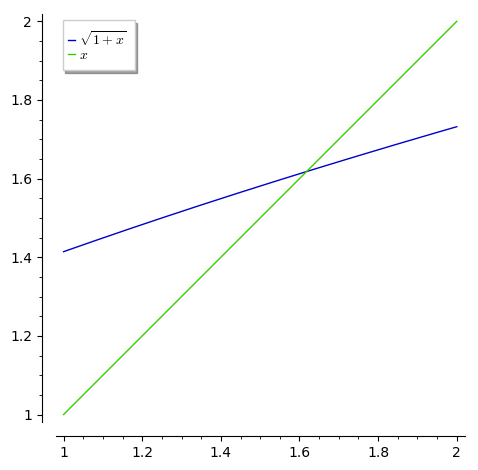

In [8]:
var('x')
plot([sqrt(1+x),x], (x,1,2), legend_label=[r"$\sqrt{1+x}$",r"$x$"], aspect_ratio=1)

This means if we let $f(x)=\sqrt{1+x}$ and $f_n(x)$ be $f$ applied to $x$ for $n$ times, then $f_n(x)$ converges to the fixed point of $f(x)$, regardless of where you start. And this fixed point is

In [9]:
sol = solve(1+x==x^2,x)
show(sol[1])

x == 1/2*sqrt(5) + 1/2

This concludes the proof.